<a href="https://colab.research.google.com/github/AyushAneja/Project-Sharing/blob/master/Bank_Modelling_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP-1 )
Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc

1. Importing the necessary libraries
2. Importing the necessary Dataset
3. The datatype , NON-NULL count and the feature columns 
4. Statistical Summary of the data 
5. Shape of the data





In [85]:
  #1-A) Importing the necessary libraries 

import numpy as np #importing numpy library
import pandas as pd  # To read the dataset as dataframe
import seaborn as sns # For Data Visualization 
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline
from sklearn.model_selection import train_test_split # For train-test split

from sklearn.metrics import  classification_report
from sklearn.linear_model import LogisticRegression # For logistic Regression
from sklearn.naive_bayes import GaussianNB # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # For K-NN Classifier
from sklearn.svm import SVC # For support vector machine based classifier
from sklearn.ensemble import RandomForestClassifier# For random forest  based classifier
from scipy.stats import zscore# imports the zscore from statistics module
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor# Used for checking the multicollinerity
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer# Used for transforming the feature columns
from sklearn.preprocessing import OneHotEncoder# Used to convert categorical or class data 


from sklearn.preprocessing import StandardScaler# Used to scale the feature columns 
from sklearn.metrics import confusion_matrix, accuracy_score# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score




In [87]:
#1-B) Importing the necessary Dataset
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

#1-C) The datatype , NON-NULL count and the feature columns 
print(data.info())

#1-D)Statistical Summary of the data 
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age  ...       Online  

STEP-2) Data Cleaning Steps:


1.  The column attribute "ID" doesn't provide any significant information about a customer buying a personal loan hence we will skip analysis of the same. Such type of column is randomly generated and has a lot noise and no signal.The unique values count is very high so it is just a random data.  

2. The problem of Multicollinearty is checked using various techniques like VIF and Correlation matirx 






,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.600000,1,0,0,1,0,0,0
1,45,34,3,1.500000,1,0,0,1,0,0,0
2,39,11,1,1.000000,1,0,0,0,0,0,0
3,35,100,1,2.700000,2,0,0,0,0,0,0
4,35,45,4,1.000000,2,0,0,0,0,0,1
5,37,29,4,0.400000,2,155,0,0,0,1,0
6,53,72,2,1.500000,2,0,0,0,0,1,0
7,50,22,1,0.300000,3,0,0,0,0,0,1
8,35,81,3,0.600000,2,104,0,0,0,1,0
9,34,180,1,8.900000,3,0,1,0,0,0,0


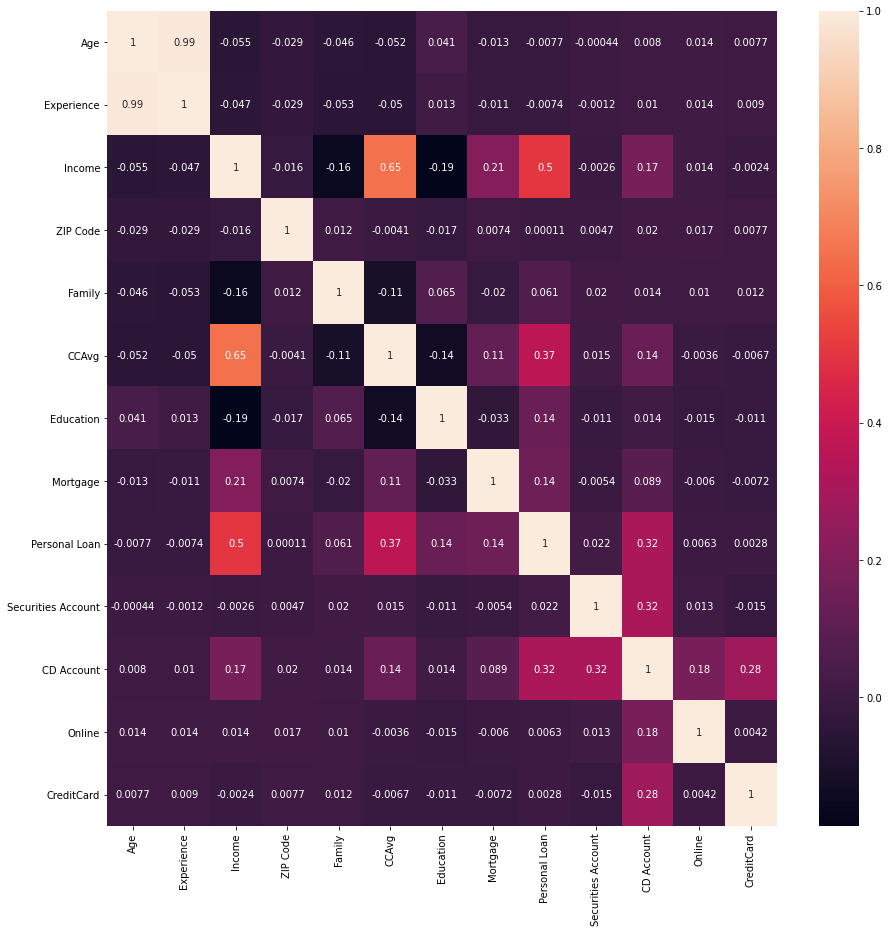

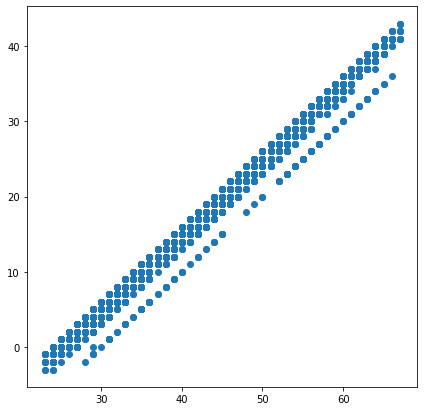

In [88]:
#2) Data Cleaning Steps:

# The column attribute "ID" doesn't provide any significant information about a customer
# buying a personal loan hence we will skip analysis of the same. Such type of column is randomly generated and has a lot 
# noise and no signal.The unique values count is very high so it is just a random data.
del data["ID"]

# This is for the correlation matrix which will help in determing the columns that are free from the data cleaning step
fig,ax=plt.subplots(figsize=(15,15))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)

# This is a manual looping which uses no in-built function and this is used to store the columns as dictionary items 
# which will map those columns which has high linear Pearson correlation. The columns that are highly collinear should 
# be checked.


l={}
for i in range(13):
    j=0
    while j<=i:
        if corrMatrix.iloc[i,j]>=0.80 or corrMatrix.iloc[i,j]<=-0.80:
            if i!=j:
                l[i]=j
        j=j+1
        
        
# This factor is used to detect multicollinearity. This will confirm the result of the correlation matrix and will help
# us to clean the data.
def calc_vif(X):
    vif = pd.DataFrame()
    # Calculating VIF
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
# X is an array extracted from the dataframe data.
X=data.iloc[:,:]
calc_vif(X)

# This plot is a scatterplot which shows us high correlation between the Age and Experience feature column.
# This gives us the clue that any one of them can suffice our need.
plt.figure(figsize=(7,7))
plt.scatter(x='Age',y='Experience',data=data)

# We know Age and Experience column is highly correlated so we can remove one of them its better to remove Experience 
# column because we can observe that the min count of experience is -3 which is not possible so it is a faulty data
# that can make our model decide badly so its better to remove the column Experience.
del data["Experience"]

X=data.iloc[:,:]
calc_vif(X)

# By seeing the VIF of ZIP code its better to remove it as its VIF is greater than 10
del data["ZIP Code"]
X=data.iloc[:,:]
calc_vif(X)

# From this we can see that now our data is free from all the unwanted feature columns as well as all the columns 
# that needed to be cleaned are well cleaned now.
data.head(10).style.background_gradient(cmap="RdYlBu")



In [39]:
data.head(10).style.background_gradient(cmap="RdYlBu")

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.600000,1,0,0,1,0,0,0
1,45,34,3,1.500000,1,0,0,1,0,0,0
2,39,11,1,1.000000,1,0,0,0,0,0,0
3,35,100,1,2.700000,2,0,0,0,0,0,0
4,35,45,4,1.000000,2,0,0,0,0,0,1
5,37,29,4,0.400000,2,155,0,0,0,1,0
6,53,72,2,1.500000,2,0,0,0,0,1,0
7,50,22,1,0.300000,3,0,0,0,0,0,1
8,35,81,3,0.600000,2,104,0,0,0,1,0
9,34,180,1,8.900000,3,0,1,0,0,0,0


**STEP-3) EXPLORATORY DATA ANALYSIS**

1. Value counts of various categorical and continuos variables
2. Univariate Analaysis
3. Bivariate Analysis
4. Multivariate Analysis
5. Plots related outliers


In [89]:
# 3) EDA- Exploratory Data Analysis Step

# 3-A)NO. of unique in each column
data.nunique()

# 3-B) Gives us the counts of people having zero mortgage
count_mortgage_0=0
for i in data["Mortgage"]:
    if i==0:
        count_mortgage_0=count_mortgage_0+1
print(count_mortgage_0)
count_CCAvg_0=0


# 3-C) Gives us the counts of people having zero Crdedit Card spending
for i in data["CCAvg"]:
    if i==0:
        count_CCAvg_0=count_CCAvg_0+1
print(count_CCAvg_0)



#Converting Columns to categorical and continuous for easy understanding of data
categorical_val=[]
continuous_val=[]
for column in data.columns:
    print('=================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)
        
print("")
# 3-D) Value counts of all categorical columns.
for i in range(len(categorical_val)):
    print("The count of {} is ".format(categorical_val[i]))
    print(data[categorical_val[i]].value_counts())
    print("")



3462
106
Age : [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Income : [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
Family : [4 3 1 2]
CCAvg : [ 1.6         1.5         1.          2.7         0.4         0.3
  0.6         8.9         2.4         0.1         3.8         2.5
  2.          4.7    

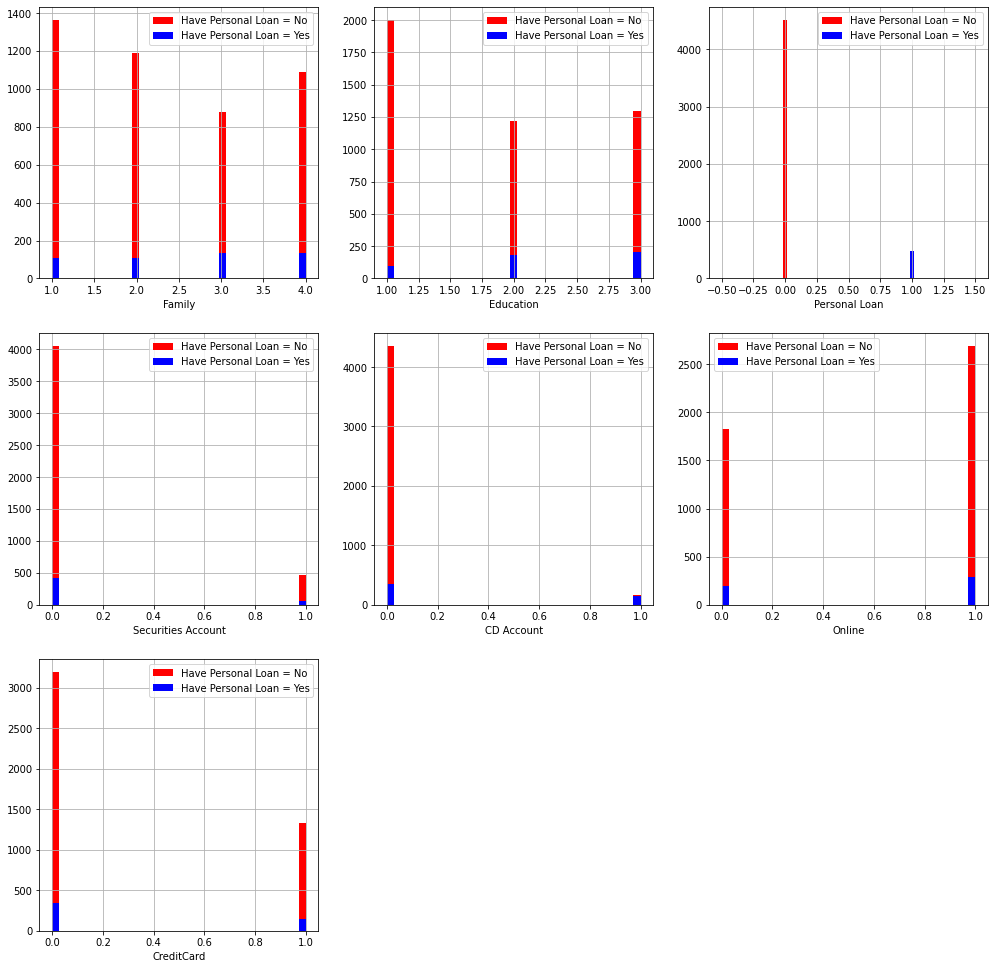

In [90]:
# Analaysis of categorical variables with the dependent variable Personal Loan
plt.figure(figsize=(17,17))
for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    data[data["Personal Loan"]==0][column].hist(bins=35,color='red',label='Have Personal Loan = No')
    data[data["Personal Loan"]==1][column].hist(bins=35,color='Blue',label="Have Personal Loan = Yes")
    plt.legend()
    plt.xlabel(column)
    

In [ ]:
#Form the above histogram chart we can see that.

#Family size of 3 and 4 members are tending to take Personal Loan.
#Customer that belong to Education category 2 and 3 i.e. Graduate and Professional have taken more Persoanl Loan then the Undergraduate class.
#Customer who does not have Security Account have taken Personal Loan .
#Customer who does not CDAcount in this higher number of customer don't have Personal Loan . We can see that customer who have CDAcount most of them had taken Personal Loan. Here CDAccount means Certificate of Deposit.
#Customer how use Internet Bank service also have higher count of Personal Loan then those who does not use Online Service.
#Customer who don't have excess to Credit Card for Universal Bank are more likely to apply for PersonaL Loan.

Age            AxesSubplot(0.125,0.657941;0.227941x0.222059)
Income      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
CCAvg       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Mortgage       AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

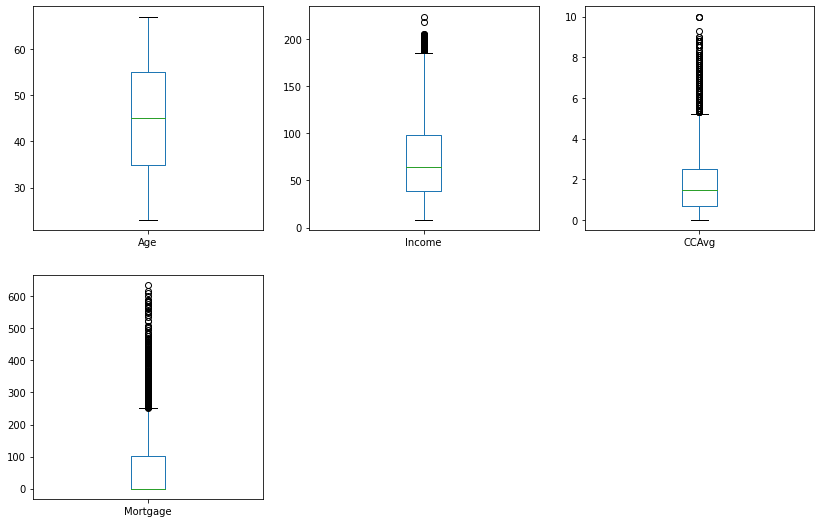

In [91]:
# Finding the outliers using Box Plot
data[continuous_val].plot(kind='box',subplots=True, layout=(3,3), fontsize=10, figsize=(14,14))



In [92]:
# From the Box Plot we can observe the Mortgage column is highly accumulated with outliers

# Removing the Outliers in Mortgage Column
Outlier = [ 'Mortgage']
Q1=data[Outlier].quantile(0.25)
Q3=data[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i] 
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


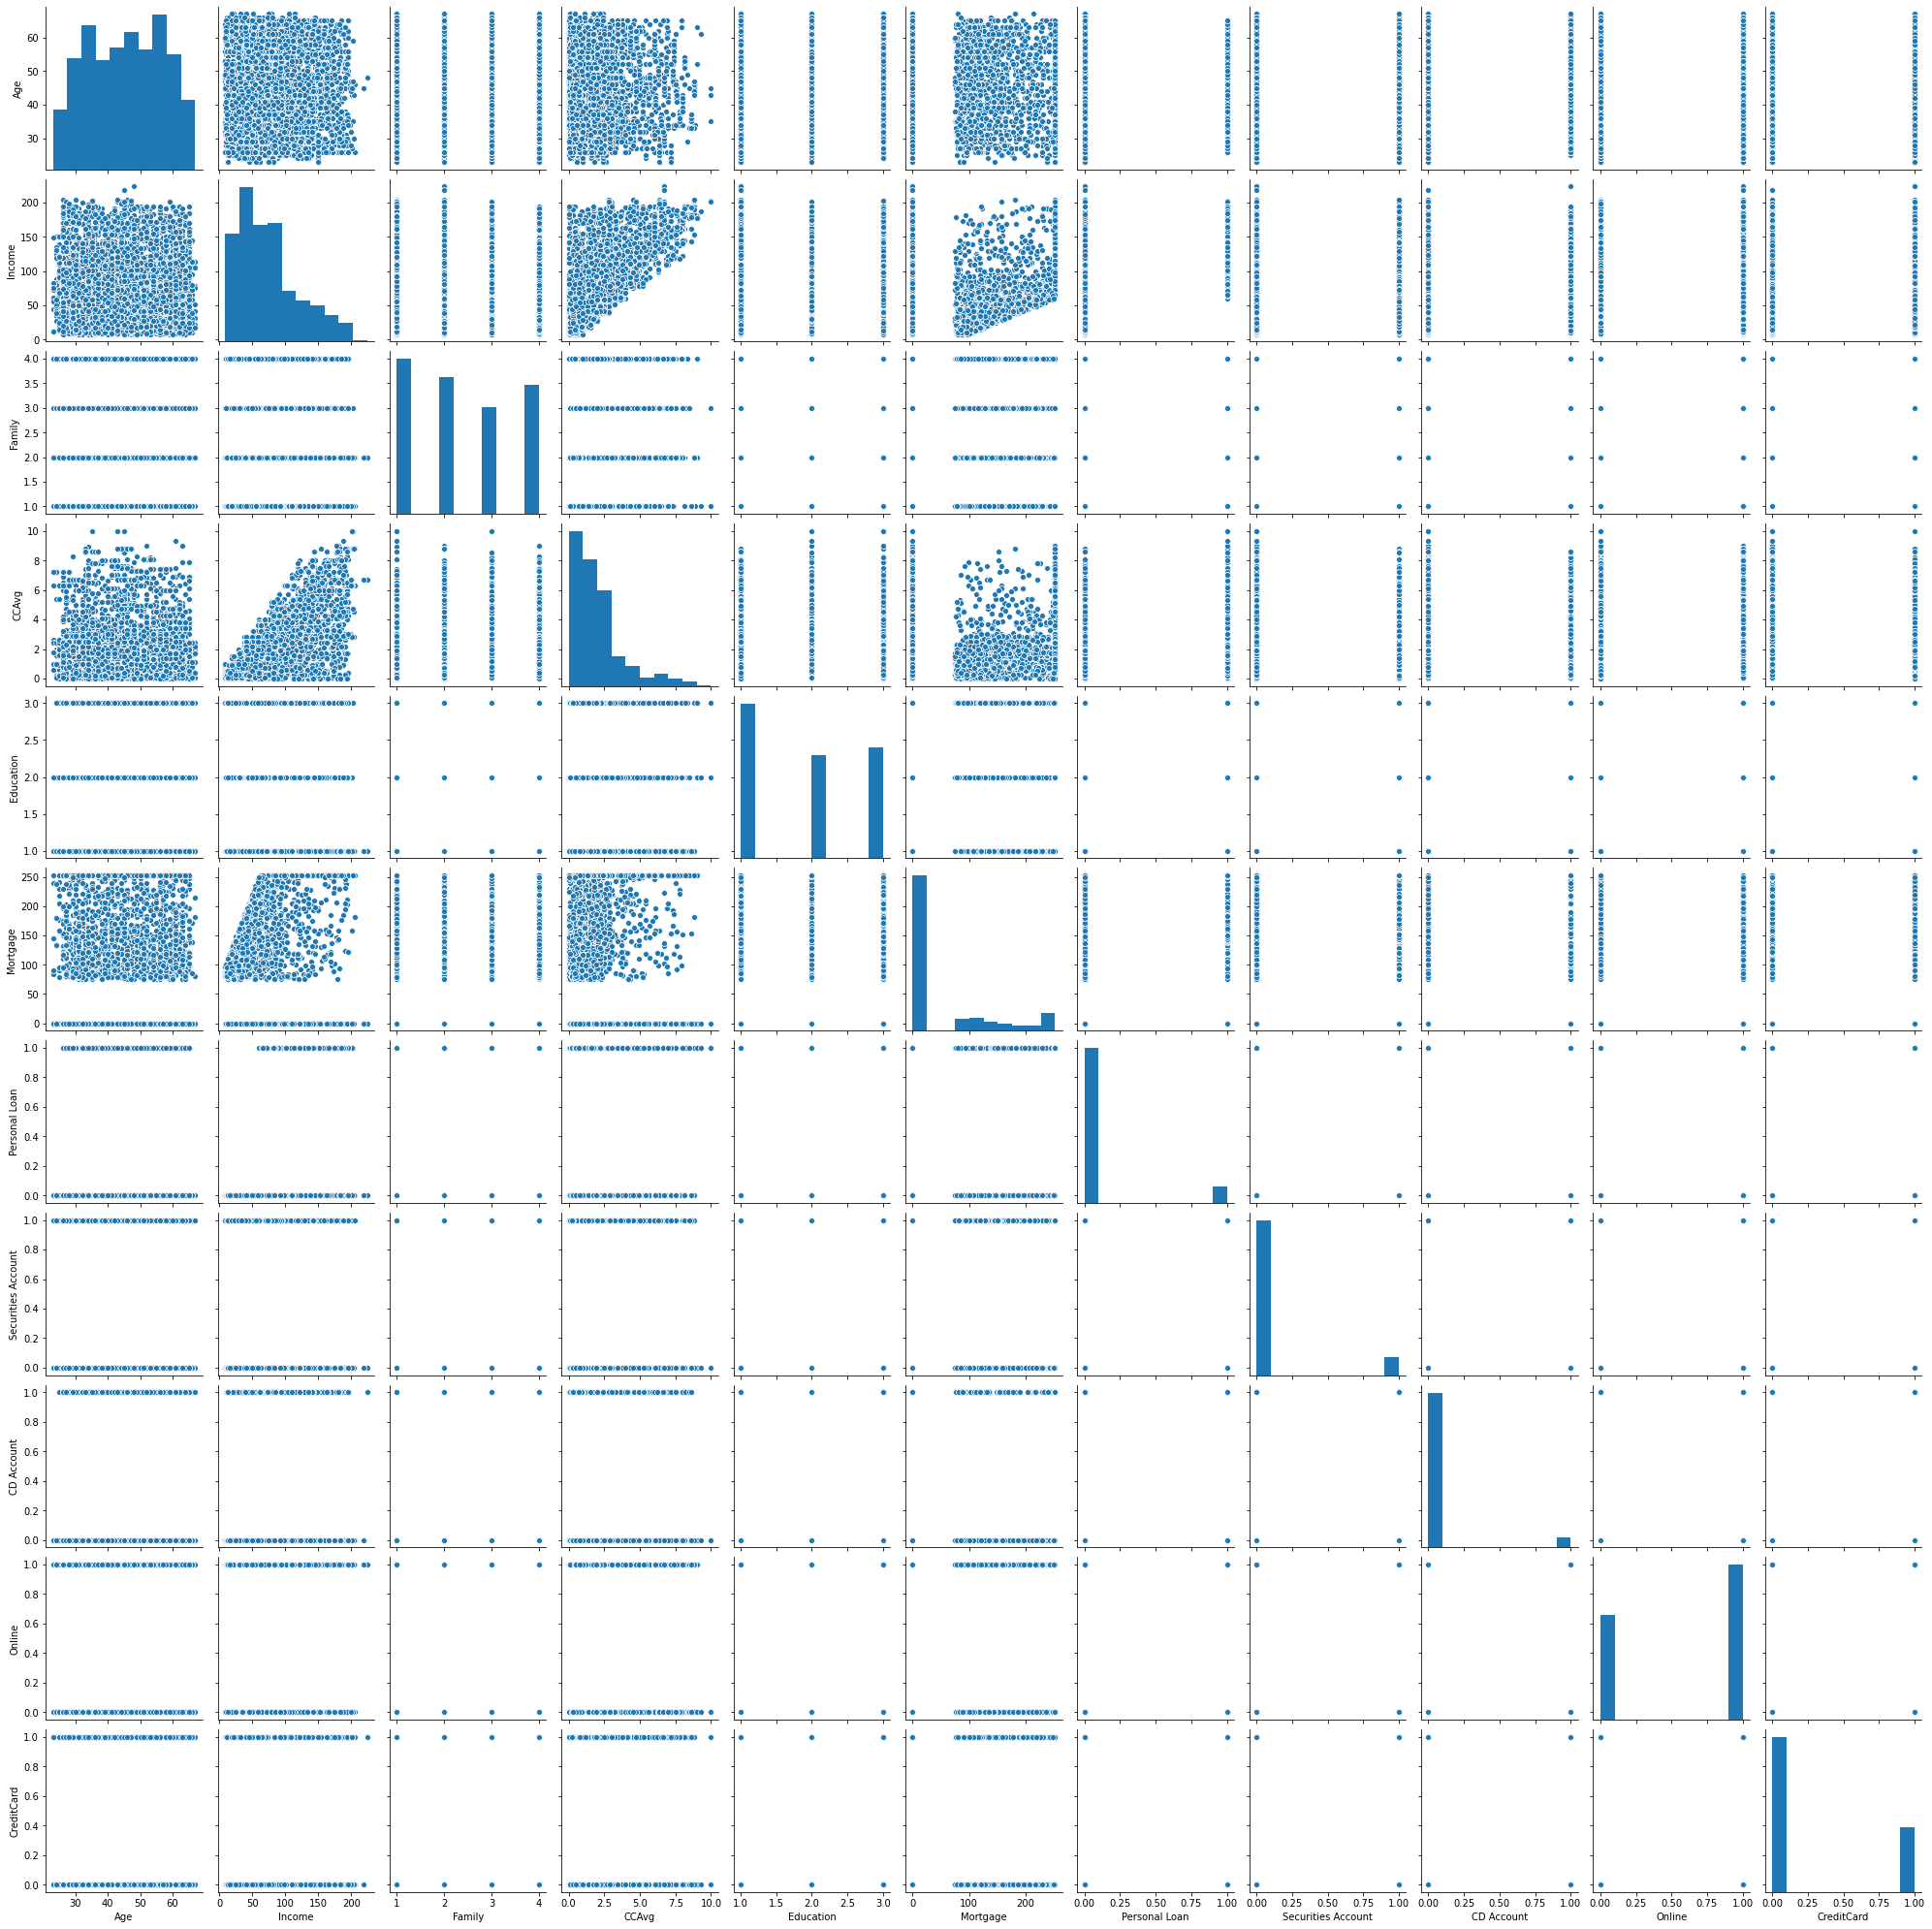

In [93]:
# 3-E) Multivariate and Univariate Analysis
# Plots between each Pair
sns.pairplot(data)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Age')]

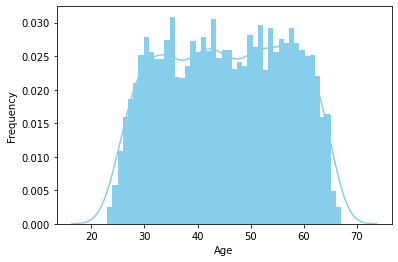

In [94]:
# Univariate Analysis


ax = sns.distplot(data[data.columns[0]],
                  bins=45,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Age', ylabel='Frequency')




[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Income')]

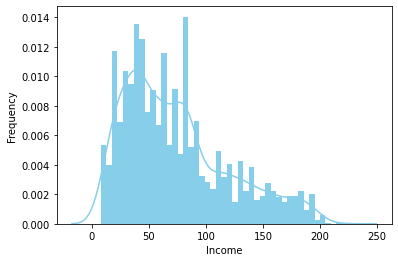

In [95]:

ax = sns.distplot(data[data.columns[1]],
                  bins=45,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Income', ylabel='Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Family')]

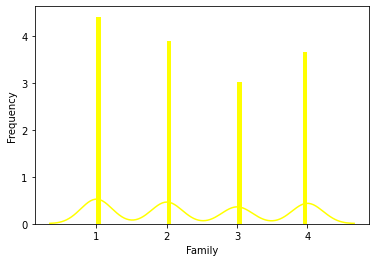

In [96]:
ax = sns.distplot(data[data.columns[2]],
                  bins=45,
                  kde=True,
                  color='yellow',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Family', ylabel='Frequency')



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'CCAvg')]

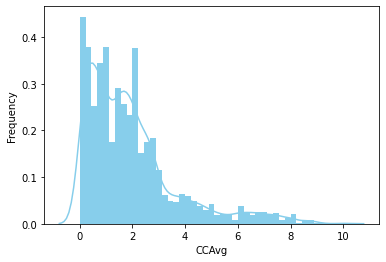

In [97]:
ax = sns.distplot(data[data.columns[3]],
                  bins=45,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='CCAvg', ylabel='Frequency')




[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Education')]

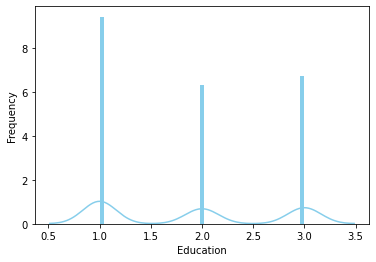

In [98]:
ax = sns.distplot(data[data.columns[4]],
                  bins=45,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Education', ylabel='Frequency')




[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Mortgage')]

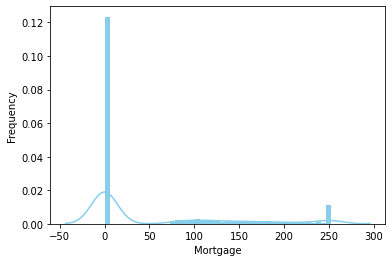

In [99]:
ax = sns.distplot(data[data.columns[5]],
                  bins=45,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Mortgage', ylabel='Frequency')



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Securities Account')]

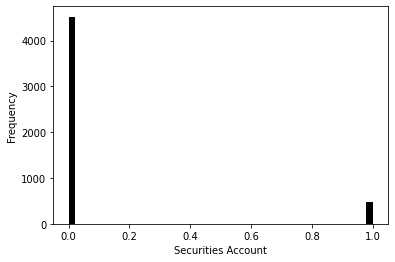

In [100]:
ax = sns.distplot(data[data.columns[6]],
                  bins=45,
                  kde=False,
                  color='black',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Securities Account', ylabel='Frequency')



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'CD Account')]

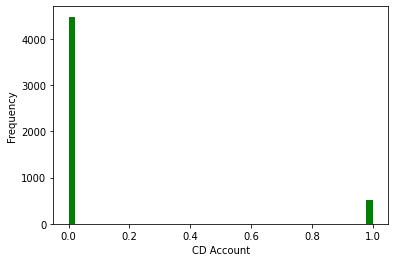

In [101]:
ax = sns.distplot(data[data.columns[7]],
                  bins=45,
                  kde=False,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='CD Account', ylabel='Frequency')




[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Online')]

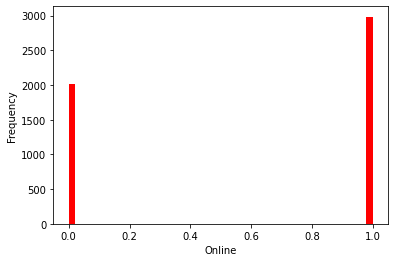

In [ ]:
ax = sns.distplot(data[data.columns[8]],
                  bins=45,
                  kde=False,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Online', ylabel='Frequency')



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'CreditCard')]

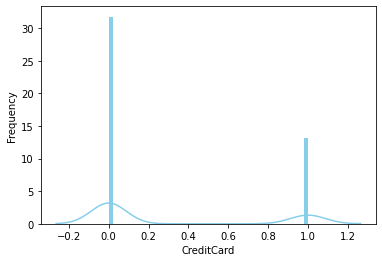

In [ ]:
ax = sns.distplot(data[data.columns[9]],
                  bins=45,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='CreditCard', ylabel='Frequency')



Personal Loan,0,1
Income,,
"(0, 50]",100.000000,0.000000
"(50, 100]",97.758805,2.241195
"(100, 150]",71.428571,28.571429
"(150, 200]",49.530516,50.469484
"(200, 250]",81.250000,18.750000


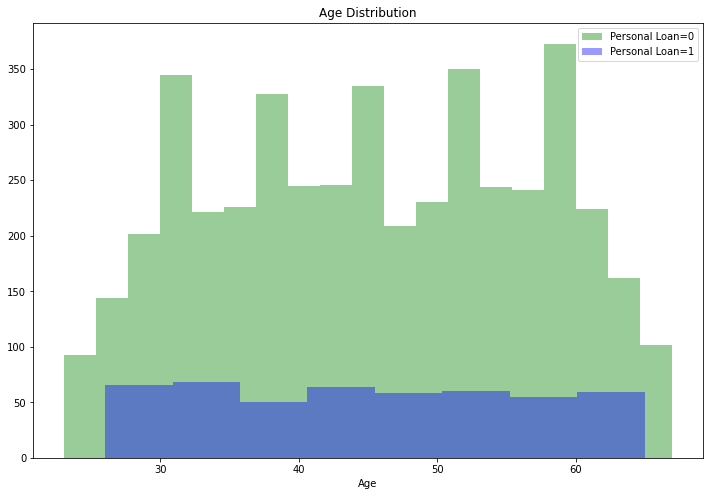

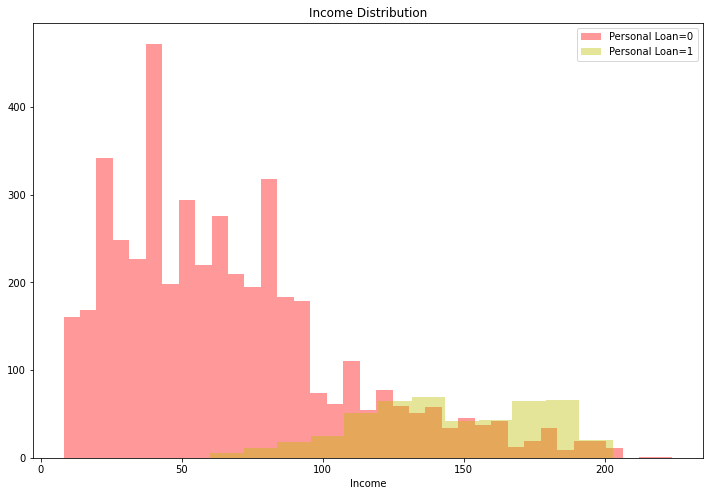

In [102]:
# Bivariate Analyis of Continuos feature columns

plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan'] == 0]['Age'],kde=False, color='g', label='Personal Loan=0')
sns.distplot(data[data['Personal Loan'] == 1]['Age'],kde=False, color='b',label='Personal Loan=1')
plt.legend()
plt.title("Age Distribution")

age_cut = pd.cut(data['Age'],bins=[20,30,40,50,60])
pd.crosstab(age_cut,data['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

#From above table as well as distribution plot of Age attribute, one can observe that most of the customers lie in the age group of 30 to 60. Also,one can observe that 10.5% of the total customers in age group 20-30 have bought personal loan from the bank, while in age groups (30-40), (40-50) and (50-60), there is a conversion rate of around 9%.


#Analyzing the Income attribute with Personal loan
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan'] == 0]['Income'],kde=False, color='r', label='Personal Loan=0')
sns.distplot(data[data['Personal Loan'] == 1]['Income'],kde=False, color='y',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")


inc_cut = pd.cut(data['Income'],bins=[0,50,100,150,200,250])
pd.crosstab(inc_cut,data['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

#No customer with income < 50,000$ opted for the personal 
#loan where as half of the cutomers with income within the 
#range of 150 to 200 thousand dollars purchased personal loan...! 
#Customers within range of (100 to 150) and (200 to 250) thousand dollars showed a 
#conversion rate of about 28.5% and 18.75%, respectively.






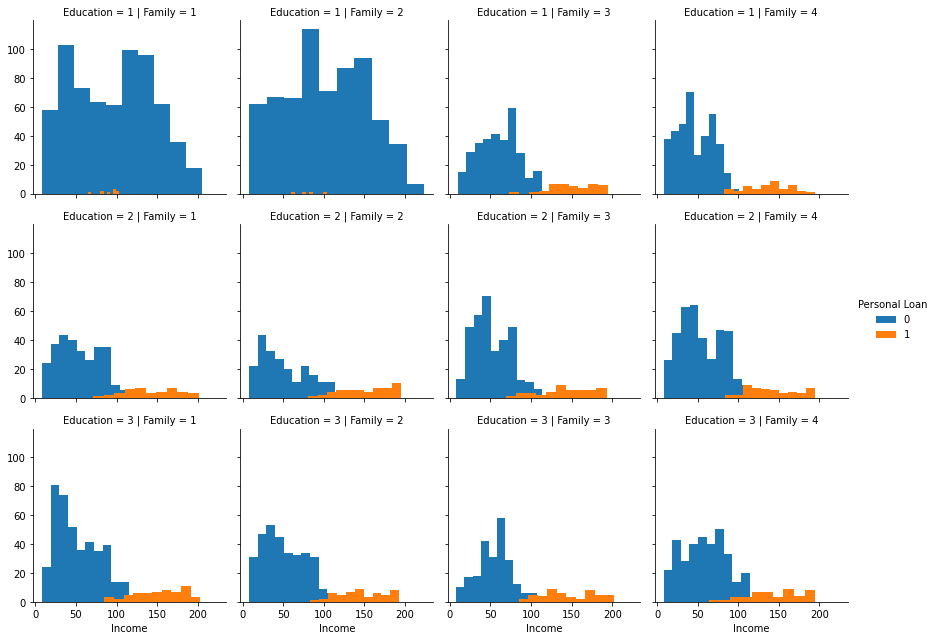

In [103]:
#Complete Bivariate Analysis
sns.FacetGrid(data=data,row='Education',col='Family',hue='Personal Loan').map(plt.hist,'Income').add_legend()

# Arranging the feature columns with respect to their correlation coefficient in descending order with the dependent variable Personal Loan.

In [104]:
# Arranging the correlation coeffecient in descending order
data.corr().loc['Personal Loan',:].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366891
CD Account            0.316355
Education             0.136722
Mortgage              0.092989
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Name: Personal Loan, dtype: float64

# The statistical significance of each feature column its p 
# value , Log liklihood and other parameters are evaluated.

In [105]:
# Significance test for numerical columns

data_num = data.loc[:,['Personal Loan', 'Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family', 'Securities Account', 'Age']]
data_num['intercept'] = 1
log_mod = sm.Logit(data_num['Personal Loan'], data_num[['intercept', 'Income', 'CCAvg', 'Mortgage', 'Age']]).fit()
log_mod.summary()



Optimization terminated successfully.
         Current function value: 0.200474
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.3660
Time:                        15:34:11   Log-Likelihood:                -1002.4
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                2.876e-249
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5513      0.309    -21.184      0.000      -7.157      -5.945
Income         0.0352      0.002     22.580      0.000       0.032       0.038
CCAvg          0.0689      0.029      2.414      0.016       0.013       0.125
Mortgage       0.0012      0.001      2.034      0.042    4.29e-05       0.002
Age            0.0080      0.005      1.559      0.119      -0.002       0.018
==============================================================================
"""

In [106]:
#One can see that,  𝑝 -values for Income, CCAvg are less than  𝛼=0.05 . Hence with 95% 
#confidence, we can say that they are significant for predicting the target attribute class. 
#Age attribute seems to be insignificant for the given problem

In [107]:
#Getting the target column distribution
# Converting above target class distribution as dataframe
data_target = data['Personal Loan'].value_counts()
data_target = pd.DataFrame({'class':data_target.index, 'count':data_target.values})

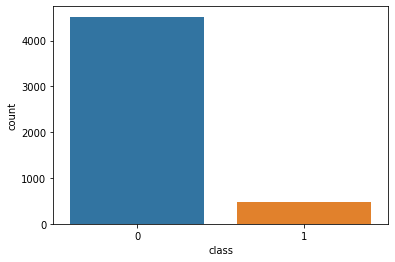

In [108]:
# barplot for target column distribution
sns.barplot(x='class',y = 'count',data=data_target);



In [109]:
# Let us add the percentage column to the dataframe.
data_target['Percentage'] = data_target['count']/data_target['count'].sum()*100
data_target

,class,count,Percentage
0,0,4520,90.4
1,1,480,9.6


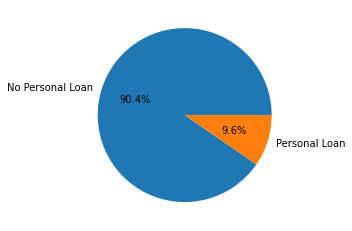

In [110]:
# Let us plot the Pie Plot
plt.pie(data_target['Percentage'],labels=['No Personal Loan','Personal Loan'],autopct= '%1.1f%%');


In [ ]:
#One can see that, 9.6% of the total customers bought the personal loan in the previous campaign
#Observation: Clearly, there is a high amount of class imbalance in the target attribute..!

**STEP-4)Transformations step**


1.   Feature Transformation--so as to convert the skewed data to nearly normal distributions.
2.   One-Hot encoding for the categorical or class feature variables to get better and unbiased results.


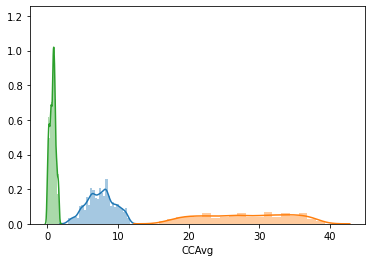

In [111]:
# As we know that the feature columns must be normally distributed and to convert them from skewed
# to normal we apply these transformations
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data["Income"].values.reshape(-1,1))
data["Income"]=pt.transform(data["Income"].values.reshape(-1,1))
sns.distplot(data["Income"])



pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data["Age"].values.reshape(-1,1))
data["Age"]=pt.transform(data["Age"].values.reshape(-1,1))
sns.distplot(data["Age"])


pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data["CCAvg"].values.reshape(-1,1))
data["CCAvg"]=pt.transform(data["CCAvg"].values.reshape(-1,1))
sns.distplot(data["CCAvg"])

In [112]:
data.head(10).style.background_gradient(cmap="RdYlBu")

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,16.948183,6.827583,4,0.845150,1,0.000000,0,1,0,0,0
1,28.004416,5.876952,3,0.814468,1,0.000000,0,1,0,0,0
2,24.791734,3.504287,1,0.633771,1,0.000000,0,0,0,0,0
3,22.605659,8.983393,1,1.107409,2,0.000000,0,0,0,0,0
4,22.605659,6.597314,4,0.633771,2,0.000000,0,0,0,0,1
5,23.703478,5.492854,4,0.322048,2,155.000000,0,0,0,1,0
6,32.182208,7.938412,2,0.814468,2,0.000000,0,0,0,1,0
7,30.628463,4.866205,1,0.253538,3,0.000000,0,0,0,0,1
8,22.605659,8.302424,3,0.442179,2,104.000000,0,0,0,1,0
9,22.052973,11.100150,1,1.722778,3,0.000000,1,0,0,0,0


In [113]:
data_Y=data["Personal Loan"]
del data["Personal Loan"]
data_X=data
# One hot encoding for the ctegorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
data_X = np.array(ct.fit_transform(data_X))



In [50]:
data_X =pd.DataFrame(data_X)
data_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,16.948183,6.827583,0.845150,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,28.004416,5.876952,0.814468,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,24.791734,3.504287,0.633771,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,22.605659,8.983393,1.107409,2.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,22.605659,6.597314,0.633771,2.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,0.0,0.0,19.248192,6.287699,0.928929,3.0,0.0,0.0,0.0,1.0,0.0
4996,0.0,0.0,0.0,1.0,19.814995,4.077942,0.322048,1.0,85.0,0.0,0.0,1.0,0.0
4997,0.0,1.0,0.0,0.0,37.262946,5.058173,0.253538,3.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,38.262652,6.827583,0.384643,2.0,0.0,0.0,0.0,1.0,0.0


In [114]:

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
data_X = np.array(ct.fit_transform(data_X))
data_X =pd.DataFrame(data_X)



**STEP-5) Splitting the dataset into train , test set and applying some Scaing.**

1.   Converting the dataset to training and test set with 70:30 ratio using the stratified sampling to ensure that the equal ratio is maintained in both train and test sets.
2.   Normalizing the data using standard scalars as we now it creates an effect on some machine learning models like logistic regression.



In [115]:
# Split the data into training and test set in the ratio of 70:30 respectively
# Train test split
train_X , test_X , train_Y , test_Y=train_test_split(data_X,data_Y,test_size=0.3 , stratify=data_Y,random_state=0)
train_X = np.array(train_X)
test_X = np.array(test_X)

In [116]:
# 5-B) Scaling or Normalisation 
sc = StandardScaler()
train_X[:, 4:6] = sc.fit_transform(train_X[:, 4:6])
test_X[:, 4:6] = sc.transform(test_X[:, 4:6])

train_X = np.array(train_X)
test_X = np.array(test_X)

sc = StandardScaler()
train_X[:, 6:8] = sc.fit_transform(train_X[:, 6:8])
test_X[:, 6:8] = sc.transform(test_X[:, 6:8])
train_X = np.array(train_X)
test_X = np.array(test_X)

sc = StandardScaler()
train_X[:, 10:11] = sc.fit_transform(train_X[:, 10:11])
test_X[:, 10:11] = sc.transform(test_X[:, 10:11])
test_Y = np.array(test_Y)

**STEP-6) Applying Logistic Regression on the dataset.**


The confusion matrix related to this algorithm is as follows : 

[[1341   15]
 [  43  101]]

The accuracy score related to this algorithm is as follows : 
0.9613333333333334

The f1-score related to this algorithm is as follows : 
0.8778775968556991


The precision related to this algorithm is as follows : 
0.8706896551724138


The recall related to this algorithm is as follows : 
0.8851852059463218


The log loss related to this algorithm is as follows : 
1.335507349910849



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


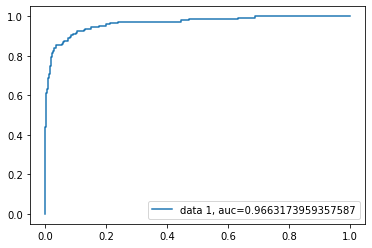

In [117]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

# 6) Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_Y)
model_list.append('LogisticRegression')
y_pred = classifier.predict(test_X)


cm = confusion_matrix(test_Y, y_pred)
print("")
print("The confusion matrix related to this algorithm is as follows : ")
print("")
print(cm)
print("")
print("The accuracy score related to this algorithm is as follows : ")
print(accuracy_score(test_Y, y_pred))
model_accuracy_score.append(accuracy_score(test_Y, y_pred))
print("")
print("The f1-score related to this algorithm is as follows : ")
f=f1_score(test_Y, y_pred, average='macro')
model_f1_score.append(f)
print(f)
print("")
print("")
print("The precision related to this algorithm is as follows : ")
p=precision_score(test_Y, y_pred)
print(p)
print("")
recall=(f*p)/(2*p-f)
print("")
print("The recall related to this algorithm is as follows : ")
print(recall)
print("")
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
print("")
print("The log loss related to this algorithm is as follows : ")
print(log_loss(test_Y, y_pred, eps=1e-15))
print("")
#AUC curve is as follows:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_Y,  y_pred_proba)
auc = metrics.roc_auc_score(test_Y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [118]:
# kernel svm
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_X, train_Y)
model_list.append('Kernel Svm')
y_pred1 = classifier.predict(test_X)

cm = confusion_matrix(test_Y, y_pred1)
print("")
print("The confusion matrix related to this algorithm is as follows : ")
print("")
print(cm)
print("")
print("The accuracy score related to this algorithm is as follows : ")
print(accuracy_score(test_Y, y_pred1))
model_accuracy_score.append(accuracy_score(test_Y, y_pred1))
print("")
print("The f1-score related to this algorithm is as follows : ")
f=f1_score(test_Y, y_pred1, average='macro')
model_f1_score.append(f)
print(f)
print("")
print("")
print("The precision related to this algorithm is as follows : ")
p=precision_score(test_Y, y_pred1)
print(p)
print("")
recall=(f*p)/(2*p-f)
print("")
print("The recall related to this algorithm is as follows : ")
print(recall)
print("")
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
print("")
print("The log loss related to this algorithm is as follows : ")
print(log_loss(test_Y, y_pred1, eps=1e-15))
print("")



The confusion matrix related to this algorithm is as follows : 

[[1341   15]
 [  49   95]]

The accuracy score related to this algorithm is as follows : 
0.9573333333333334

The f1-score related to this algorithm is as follows : 
0.8623624341203526


The precision related to this algorithm is as follows : 
0.8636363636363636


The recall related to this algorithm is as follows : 
0.8610922573551751


The log loss related to this algorithm is as follows : 
1.473662455490492



In [119]:
# K-Nearest-Neighbours
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_X, train_Y)
model_list.append('K-Nearest')
y_pred2 = classifier.predict(test_X)

cm = confusion_matrix(test_Y, y_pred2)
print("")
print("The confusion matrix related to this algorithm is as follows : ")
print("")
print(cm)
print("")
print("The accuracy score related to this algorithm is as follows : ")
print(accuracy_score(test_Y, y_pred2))
model_accuracy_score.append(accuracy_score(test_Y, y_pred2))
print("")
print("The f1-score related to this algorithm is as follows : ")
f=f1_score(test_Y, y_pred, average='macro')
model_f1_score.append(f)
print(f)
print("")
print("")
print("The precision related to this algorithm is as follows : ")
p=precision_score(test_Y, y_pred2)
print(p)
print("")
recall=(f*p)/(2*p-f)
print("")
print("The recall related to this algorithm is as follows : ")
print(recall)
print("")
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
print("")
print("The log loss related to this algorithm is as follows : ")
print(log_loss(test_Y, y_pred2, eps=1e-15))
print("")




The confusion matrix related to this algorithm is as follows : 

[[1355    1]
 [  37  107]]

The accuracy score related to this algorithm is as follows : 
0.9746666666666667

The f1-score related to this algorithm is as follows : 
0.8778775968556991


The precision related to this algorithm is as follows : 
0.9907407407407407


The recall related to this algorithm is as follows : 
0.7880989843411409


The log loss related to this algorithm is as follows : 
0.8749828684026916



In [120]:
# Random forest Regression 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_Y)
y_pred3 = classifier.predict(test_X)
model_list.append('Random Forest Regression')
cm = confusion_matrix(test_Y, y_pred3)
print("")
print("The confusion matrix related to this algorithm is as follows : ")
print("")
print(cm)
print("")
print("The accuracy score related to this algorithm is as follows : ")
print(accuracy_score(test_Y, y_pred3))
model_accuracy_score.append(accuracy_score(test_Y, y_pred3))
print("")
print("The f1-score related to this algorithm is as follows : ")
f=f1_score(test_Y, y_pred3, average='macro')
model_f1_score.append(f)
print(f)
print("")
print("")
print("The precision related to this algorithm is as follows : ")
p=precision_score(test_Y, y_pred3)
print(p)
print("")
recall=(f*p)/(2*p-f)
print("")
print("The recall related to this algorithm is as follows : ")
print(recall)
print("")
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
print("")
print("The log loss related to this algorithm is as follows : ")
print(log_loss(test_Y, y_pred3, eps=1e-15))
print("")



The confusion matrix related to this algorithm is as follows : 

[[1353    3]
 [  16  128]]

The accuracy score related to this algorithm is as follows : 
0.9873333333333333

The f1-score related to this algorithm is as follows : 
0.9619683069224354


The precision related to this algorithm is as follows : 
0.9770992366412213


The recall related to this algorithm is as follows : 
0.947298852861046


The log loss related to this algorithm is as follows : 
0.43749276686373



In [121]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(train_X, train_Y)
y_pred4 = classifier.predict(test_X)
model_list.append('DecisionTressResgression')
cm = confusion_matrix(test_Y, y_pred4)
print("")
print("The confusion matrix related to this algorithm is as follows : ")
print("")
print(cm)
print("")
print("The accuracy score related to this algorithm is as follows : ")
print(accuracy_score(test_Y, y_pred4))
model_accuracy_score.append(accuracy_score(test_Y, y_pred4))
print("")
print("The f1-score related to this algorithm is as follows : ")
f=f1_score(test_Y, y_pred4, average='macro')
model_f1_score.append(f)
print(f)
print("")
print("")
print("The precision related to this algorithm is as follows : ")
p=precision_score(test_Y, y_pred4)
print(p)
print("")
recall=(f*p)/(2*p-f)
print("")
print("The recall related to this algorithm is as follows : ")
print(recall)
print("")
from sklearn.metrics import log_loss  
# where y_pred are probabilities and y_true are binary class labels
print("")
print("The log loss related to this algorithm is as follows : ")
print(log_loss(test_Y, y_pred4, eps=1e-15))
print("")



The confusion matrix related to this algorithm is as follows : 

[[1348    8]
 [  13  131]]

The accuracy score related to this algorithm is as follows : 
0.986

The f1-score related to this algorithm is as follows : 
0.9590329700056314


The precision related to this algorithm is as follows : 
0.9424460431654677


The recall related to this algorithm is as follows : 
0.976214212194966


The log loss related to this algorithm is as follows : 
0.48354713404837824



In [122]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(train_X, train_Y)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier.predict(test_X)
cm = confusion_matrix(test_Y, y_pred5)
print(cm)
print("Accuracy score related to XGBoost is as follows------:")
print(accuracy_score(test_Y, y_pred5))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = train_X, y = train_Y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[1348    8]
 [  15  129]]
Accuracy score related to XGBoost is as follows------:
0.9846666666666667
Accuracy: 98.43 %
Standard Deviation: 0.74 %


# **STEP-8) Comparison between Different models**

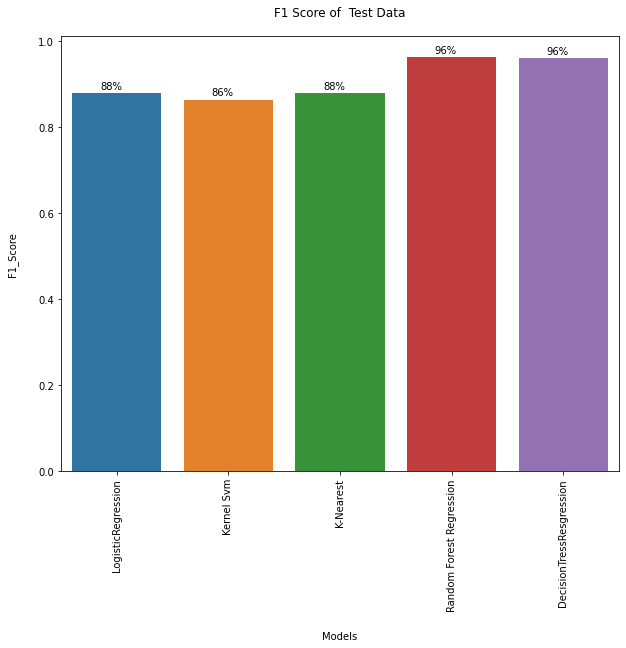

In [123]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(model_list,model_f1_score)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))


    

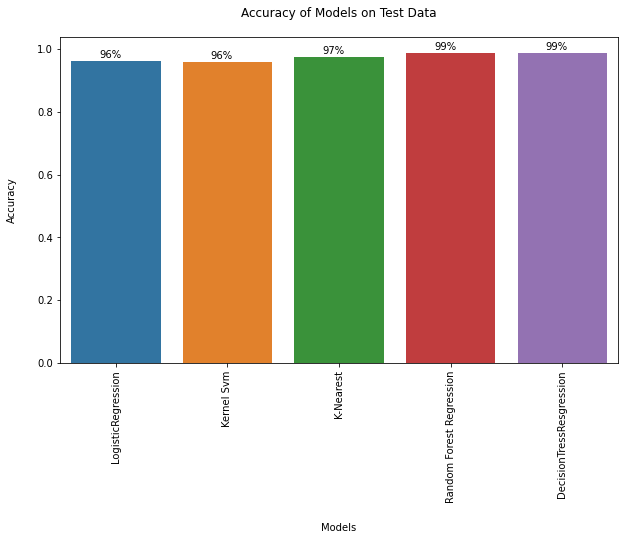

In [124]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(model_list,model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

# **Conclusion**
Among the 5 models that we have implemented  RandomForestClassifier gives the  best F1 Score and accuracy score with almost accuracy of 98.8% and F1-Score of 96%. The ensemble technique is more fruitful in such cases. 

# **STEP-9) Business Understanding of the Model is as follows:**



1. Customers with family size equal to 3 have more chances of having Personal Loan.

2. Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree.

3. Customers with CD Account and Securities Account have more chances of having Personal Loan.

4. Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan


5. Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.

6. Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage.

7. Income is a strong attribute which effect the chances of having Personl Loan High the Income High the chances of having Personal Loan.

8. CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month.

9. Customers want to have high Mortgage have opted for Personal Loan

10. Customers with CD Accounts have chances of having Personal Loan.



